In [1]:
import numpy as np
import matplotlib.pyplot as plt
import split
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
l0 = 0.276 #in nanometer

In [3]:
E0 = 2.5 #"energy of the wavepacket" 
DE = 0.08 #spread of wavepacket in energy
N = 1000 #number of position points
V0 = 2. #height of the potential barrier
a = 1 #in nanometer
itnum = 400 #number of iterations for the time evolution

In [4]:
#calculate one scattering with the above parameters
xs, sps, fw, T = split.scattering(E0 = E0, DE = DE, N = N, V0 = V0, a = a, itnum = itnum)

In [5]:
#take a look at the snapshots
fig = plt.figure()

def plots(time):
    plt.ylim(-1,1)
    plt.xlim(-100*l0,100*l0)
    plt.xlabel(r"$x$ [nm]", fontsize = 16)
    plt.ylabel(r"$\psi(x)$", fontsize = 16)
    plt.plot(xs*l0,np.real(sps[time]))
    return

interact(plots, time = (1,len(sps)-1));

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=402, description='time', max=803, min=1), Output()), _dom_classes=('widg…

In [6]:
DE = 0.2 #spread of wavepacket in energy
N = 1000 #number of position points
V0 = 2. #height of the potential barrier
a = 1 #in nanometer
itnum = 400 #number of iterations for the time evolution

In [7]:
#do the scattering for several energy values
E0s = np.linspace(2.1,5,100)
acs = split.get_acurve_energies(Es = E0s, V0 = V0, width = a)

In [8]:
#obtain only the transmission amplitudes now
Ts = split.multi_scattering(E0s = E0s, DE = DE, N = N, V0 = V0, a = a, itnum = itnum)

Text(0, 0.5, '$T$')

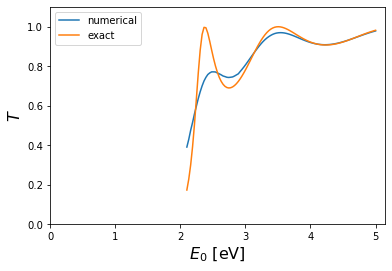

In [10]:
#take a look at the results
fig = plt.figure()
plt.plot(E0s,Ts, label = "numerical")
plt.plot(E0s,acs, label = "exact")
plt.ylim(0,1.1)
plt.xlim(0)
plt.legend()
plt.xlabel(r"$E_0$ [eV]", fontsize = 16)
plt.ylabel(r"$T$", fontsize = 16)

The numerical values seems to be good but maybe we can get better results if we try to fit the numerical method for the spread in energy DE

In [11]:
from scipy.optimize import curve_fit

In [12]:
#fir for DE
p, pcov = curve_fit(lambda x, de: split.multi_scattering(x,de,N,V0,a,itnum), xdata = E0s, ydata = acs)

In [13]:
#the optimal DE value is this
p[0]

0.0802834942789567

In [15]:
#now use this value to get a better fit
DE = p[0]

In [16]:
fitted_Ts = split.multi_scattering(E0s = E0s, DE = DE, N = N, V0 = V0, a = a, itnum = itnum)

Text(0, 0.5, '$T$')

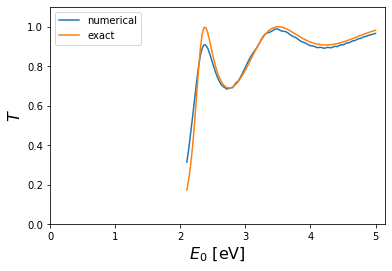

In [18]:
fig = plt.figure()
plt.plot(E0s,fitted_Ts, label = "numerical")
plt.plot(E0s,acs, label = "exact")
plt.ylim(0,1.1)
plt.xlim(0)
plt.legend()
plt.xlabel(r"$E_0$ [eV]", fontsize = 16)
plt.ylabel(r"$T$", fontsize = 16)

With this value for the spread in E we get a very good fit.